In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
fashion_log = pd.read_csv("fashion_result/log.csv")
noisy_mnist_log = pd.read_csv("mnist_noisy_0_38_result/log.csv")
mnist_log = pd.read_csv("mnist_result/log.csv")

In [20]:
def acc_curve(log, name="acc_curve.png"):
    epochs = np.array(log["epoch"])
    loss = np.array(log["capsnet_acc"])
    val_loss = np.array(log["val_capsnet_acc"])
    plt.plot(epochs, loss, label="Train")
    plt.plot(epochs, val_loss, label="Validation")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()
    plt.savefig(name)
    plt.show()

In [17]:
def loss_curve(log, name="loss_curve.png"):
    epochs = np.array(log["epoch"])
    loss = np.array(log["capsnet_loss"])
    val_loss = np.array(log["val_capsnet_loss"])
    plt.plot(epochs, loss, label="Train")
    plt.plot(epochs, val_loss, label="Validation")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.savefig(name)
    plt.show()

In [27]:
def plot_log(filename, show=True):

    data = pd.read_csv(filename)

    fig = plt.figure(figsize=(4,6))
    fig.subplots_adjust(top=0.95, bottom=0.05, right=0.95)
    fig.add_subplot(211)
    for key in data.keys():
        if key.find('loss') >= 0 and not key.find('val') >= 0:  # training loss
            plt.plot(data['epoch'].values, data[key].values, label=key)
    plt.legend()
    plt.title('Training loss')

    fig.add_subplot(212)
    for key in data.keys():
        if key.find('acc') >= 0:  # acc
            plt.plot(data['epoch'].values, data[key].values, label=key)
    plt.legend()
    plt.title('Training and validation accuracy')

    # fig.savefig('result/log.png')
    if show:
        plt.show()

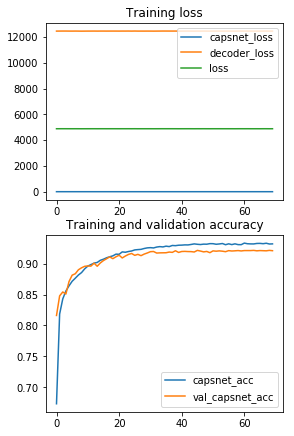

In [28]:
plot_log("fashion_result/log.csv")

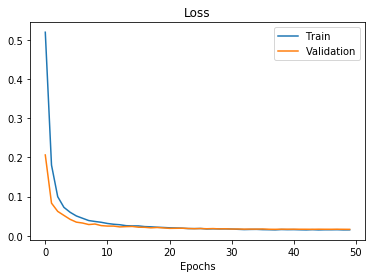

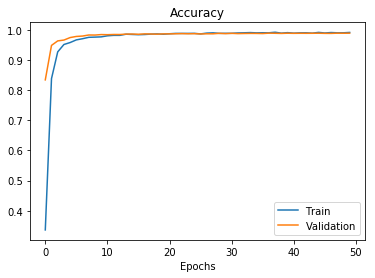

In [22]:
loss_curve(mnist_log, "mnist_loss.png")
acc_curve(mnist_log, "mnist_acc.png")

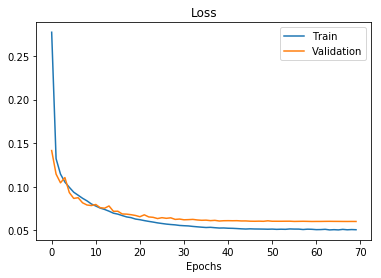

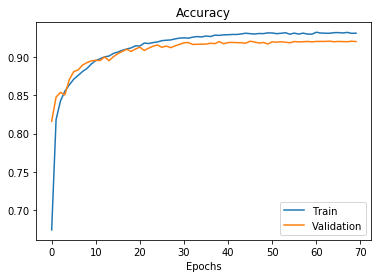

In [23]:
loss_curve(fashion_log, "fashion_loss.png")
acc_curve(fashion_log, "fashion_acc.png")

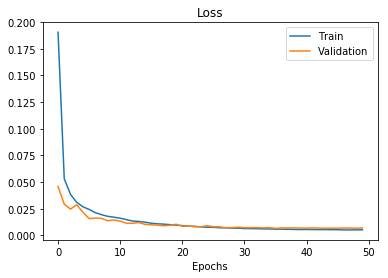

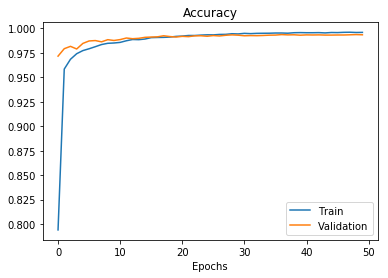

In [29]:
loss_curve(noisy_mnist_log, "noisy_mnist_loss.png")
acc_curve(noisy_mnist_log, "noisy_mnist_acc.png")

In [32]:
mnist = np.load("mnistData.npz")
mnist_0_14 = np.load("mnist_noisy_Data_0_14.npz")
mnist_0_22 = np.load("mnist_noisy_Data_0_22.npz")
mnist_0_3 = np.load("mnist_noisy_Data_0_3.npz")
mnist_0_38 = np.load("mnist_noisy_Data_0_38.npz")

In [39]:
m = (mnist["X_train"][0])
m014 = (mnist_0_14["X_train"][0])
m022 = (mnist_0_22["X_train"][0])
m03 = (mnist_0_3["X_train"][0])
m038 = (mnist_0_38["X_train"][0])

In [97]:
sets = [mnist["X_train"], mnist_0_14["X_train"], mnist_0_22["X_train"], mnist_0_3["X_train"], mnist_0_38["X_train"]]
noises = ["Clean", "0.14", "0.22", "0.3", "0.38"]
inds = [0, 5, 20, 40]
sets2 = [sets[0]] + [sets[-1]]
noises2 = [noises[0]] + [noises[-1]]

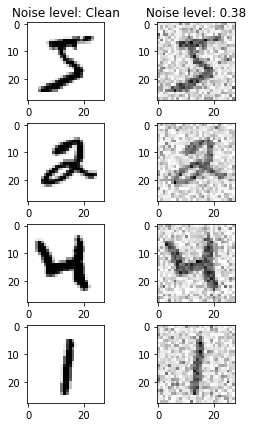

In [103]:
numSets = len(sets2)
numInds = len(inds)
fig = plt.figure(figsize=(7,7))
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=-0.5)
for i in range(numSets):
    for j in range(numInds):
        sub = fig.add_subplot(numInds, numSets, numSets*j + i + 1)
        sub.imshow(sets2[i][inds[j]], cmap="gray_r")
        if j==0:
            sub.title.set_text("Noise level: "+noises2[i])
        #plt.subplot(numInds, numSets, numSets*j + i + 1).imshow(sets[i][inds[j]], cmap="gray_r")
plt.savefig("noise_partial.png")
plt.show()

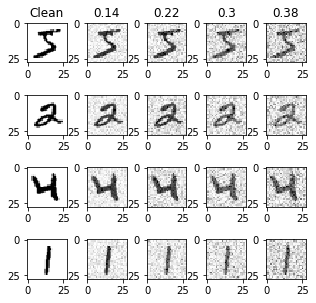

In [101]:
numSets = len(sets)
numInds = len(inds)
fig = plt.figure(figsize=(5,5))
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.5)
for i in range(numSets):
    for j in range(numInds):
        sub = fig.add_subplot(numInds, numSets, numSets*j + i + 1)
        sub.imshow(sets[i][inds[j]], cmap="gray_r")
        if j==0:
            sub.title.set_text(noises[i])
        #plt.subplot(numInds, numSets, numSets*j + i + 1).imshow(sets[i][inds[j]], cmap="gray_r")
plt.savefig("noise_full.png")
plt.show()

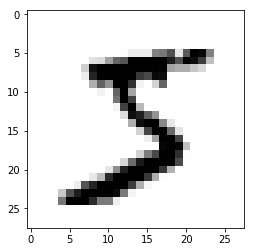

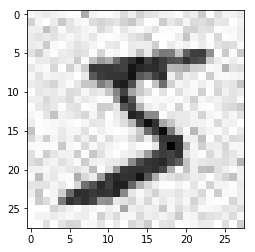

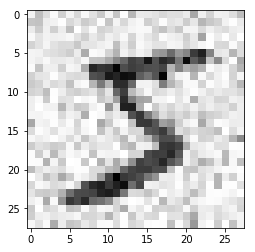

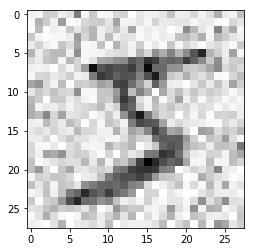

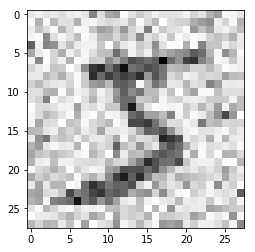

In [38]:
plt.imshow(mnist["X_train"][0], cmap="gray_r")
plt.show()
plt.imshow(mnist_0_14["X_train"][0], cmap="gray_r")
plt.show()
plt.imshow(mnist_0_22["X_train"][0], cmap="gray_r")
plt.show()
plt.imshow(mnist_0_3["X_train"][0], cmap="gray_r")
plt.show()
plt.imshow(mnist_0_38["X_train"][0], cmap="gray_r")
plt.show()